# Data Analysis of Airbnb hosts in Seattle
As more travellers choose Airbnb as their primary lodging provider, Airbnb has successfully disrupted the traditional hospitality industry. Since its founding in 2008, Airbnb has experienced exponential growth, with the number of rentals listed on its website increasing at an exponential rate each year.

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

### Content
The following Airbnb activity is included in this Seattle dataset:

Listings, including full descriptions and average review score
Reviews, including unique id for each reviewer and detailed comments
Calendar, including listing id and the price and availability for that day


<img src="future.jpg" width=900 height=300 />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import test1 as t
import seaborn as sns
%matplotlib inline


In [12]:
pd.set_option("display.max_columns", None)

In [5]:
import os
os.listdir()

['calendar.csv',
 'listings.csv',
 'reviews.csv',
 'Seattle Airbnb Data Analysis.ipynb']

In [38]:
calendar=pd.read_csv('calendar.csv')
listings=pd.read_csv('listings.csv')
reviews=pd.read_csv('reviews.csv')

## Step-1 Taking a look at the data

In [5]:
calendar.shape, listings.shape,reviews.shape

((1393570, 4), (3818, 92), (84849, 6))

In [6]:
calendar.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [7]:
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [8]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [93]:
df_raw=listings

In [74]:
columns_to_keep=['id',
 'host_location',
  'host_neighbourhood',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city','price',
 'state',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'amenities',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_location',
 'cancellation_policy']

In [239]:
listings=pd.read_csv('listings.csv')

In [247]:
def clean_listings(df):
    df=df[columns_to_keep]
    change_to_float_columns=['cleaning_fee','extra_people', 'price']
    for col in change_to_float_columns:
        df[col]=df[col].str.replace("$","").str.replace(",","").str.replace("%","").astype(float)
    fill_mean_columns=['cleaning_fee','review_scores_rating','review_scores_cleanliness','review_scores_location']
    for col in fill_mean_columns:
        df[col]=df[col].fillna(df[col].mean())
    outlier_columns=['price', 'extra_people', 'cleaning_fee','bathrooms','bedrooms']
    for col in outlier_columns:
        df[col]=np.where(df[col]>df[col].quantile(0.80),df[col].quantile(0.80),df[col])
    # dropping small number of null values for numeric columns
    df.dropna(subset=['bathrooms', 'bedrooms'], inplace=True)
    # dropping small number of null values for object columns
    df.dropna(subset=['host_neighbourhood','host_location','host_has_profile_pic','host_identity_verified','property_type','neighbourhood'], inplace=True)
    df.amenities=df.amenities.str.strip('{}').str.replace('"','').split(',')
    h=[]
    for i in df.amenities:
        h.append(len(i))
    df['amneties_number']=h
    
    return df
ans=clean_listings(listings)

<ipython-input-247-47ed9588dece>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].str.replace("$","").str.replace(",","").str.replace("%","").astype(float)
<ipython-input-247-47ed9588dece>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].fillna(df[col].mean())
<ipython-input-247-47ed9588dece>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

AttributeError: 'Series' object has no attribute 'split'

In [244]:
ans.dropna(subset=['host_neighbourhood','host_location','host_has_profile_pic','host_identity_verified','property_type','neighbourhood'], inplace=True)

In [248]:
ans.isnull().mean().sort_values(ascending=False)

amneties_number                 0.0
is_location_exact               0.0
host_location                   0.0
host_neighbourhood              0.0
host_has_profile_pic            0.0
host_identity_verified          0.0
neighbourhood                   0.0
neighbourhood_cleansed          0.0
neighbourhood_group_cleansed    0.0
city                            0.0
price                           0.0
state                           0.0
latitude                        0.0
longitude                       0.0
property_type                   0.0
cancellation_policy             0.0
accommodates                    0.0
bathrooms                       0.0
bedrooms                        0.0
amenities                       0.0
cleaning_fee                    0.0
guests_included                 0.0
extra_people                    0.0
minimum_nights                  0.0
maximum_nights                  0.0
review_scores_rating            0.0
review_scores_cleanliness       0.0
review_scores_location      

In [225]:
ans.amenities

0       {TV,"Cable TV",Internet,"Wireless Internet","A...
1       {TV,Internet,"Wireless Internet",Kitchen,"Free...
2       {TV,"Cable TV",Internet,"Wireless Internet","A...
3       {Internet,"Wireless Internet",Kitchen,"Indoor ...
4       {TV,"Cable TV",Internet,"Wireless Internet",Ki...
                              ...                        
3813    {TV,"Cable TV",Internet,"Wireless Internet","A...
3814    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
3815    {"Cable TV","Wireless Internet",Kitchen,"Free ...
3816    {TV,"Wireless Internet",Kitchen,"Free Parking ...
3817    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, Length: 3796, dtype: object

In [216]:
df=ans

In [230]:
h=[]
for i in df.amenities:
    h.append(len(i))
df['amneties_number']=h

In [231]:
df['amneties_number']

0       114
1       243
2       291
3       197
4       181
       ... 
3813    221
3814    238
3815    273
3816    167
3817    314
Name: amneties_number, Length: 3796, dtype: int64

In [201]:
a='{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}'

In [206]:
a.strip('{}')

'TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer'

In [209]:
from collections import Counter

In [208]:

a.strip('{}').replace('"','').split(',')

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer']

In [194]:
ans.select_dtypes(include=['float','int']).isnull().mean().sort_values(ascending=False)

review_scores_location       0.0
review_scores_cleanliness    0.0
review_scores_rating         0.0
extra_people                 0.0
cleaning_fee                 0.0
bedrooms                     0.0
bathrooms                    0.0
longitude                    0.0
latitude                     0.0
price                        0.0
dtype: float64

In [180]:
df=ans

In [184]:
dropna_columns=['bathrooms','bedrooms']
for col in dropna_columns:
    df[col].dropna(how='any',inplace=True)

E:\anaconda\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [185]:
df.select_dtypes(include=['object']).isnull().mean().sort_values(ascending=False)

bedrooms                        1.000000
bathrooms                       1.000000
neighbourhood                   0.108958
host_neighbourhood              0.078575
host_location                   0.002095
host_identity_verified          0.000524
host_has_profile_pic            0.000524
property_type                   0.000262
cancellation_policy             0.000000
amenities                       0.000000
is_location_exact               0.000000
state                           0.000000
city                            0.000000
neighbourhood_group_cleansed    0.000000
neighbourhood_cleansed          0.000000
dtype: float64

In [102]:
ans.cleaning_fee=np.where(ans.cleaning_fee>ans.cleaning_fee.quantile(0.80),ans.cleaning_fee.quantile(0.80),ans.cleaning_fee)

E:\anaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [105]:
ans.extra_people=np.where(ans.extra_people>ans.extra_people.quantile(0.80),ans.extra_people.quantile(0.80),ans.extra_people)

E:\anaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [106]:
ans.extra_people.describe()

count    3818.000000
mean        7.579361
std         8.743971
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        20.000000
Name: extra_people, dtype: float64

In [47]:
change_to_float_columns=['cleaning_fee','extra_people', 'host_response_rate','host_acceptance_rate','price']
for col in change_to_float_columns:
    listings[col]=listings[col].str.replace("$","").str.replace(",","").str.replace("%","").astype(float)

<ipython-input-47-9799c714f336>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings[col]=listings[col].str.replace("$","").str.replace(",","").str.replace("%","").astype(float)


In [48]:
listings['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [19]:
columns_to_keep = ['id', 'space', 'description', 'host_has_profile_pic', 'neighbourhood_group_cleansed', 
                   'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',  
                   'bedrooms', 'bed_type', 'amenities', 'square_feet', 'price', 'cleaning_fee', 
                   'security_deposit', 'extra_people', 'guests_included', 'minimum_nights',  
                   'instant_bookable', 'is_business_travel_ready', 'cancellation_policy']
len(columns_to_keep)

24

In [73]:
listings_reduced=listings[columns_to_keep]
listings_reduced.shape

(3818, 39)

In [56]:
columns_to_keep=['host_since',
       'host_location',  'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
        'host_neighbourhood',
        'host_total_listings_count',
       'host_verifications',  'host_identity_verified',
         'neighbourhood_group_cleansed',  
         'latitude', 'longitude',
        'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights' 'number_of_reviews',
        'review_scores_rating','review_scores_cleanliness',       
       'review_scores_location', 'review_scores_value', 
       'license','instant_bookable',
       'cancellation_policy']
reduced_listings=listings[listings[columns_to_keep]]
reduced_listings.head(3)

KeyError: "['maximum_nightsnumber_of_reviews'] not in index"

In [52]:
listings['market'].value_counts()

Seattle    3818
Name: market, dtype: int64

In [11]:
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


In [12]:
calendar.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [19]:
comment=['good','great','loved', 'clean','wonderful','nice','clean']
good_reviews=[]
for i in reviews.comments:
    if i in comment:
        good_reviews.append(i)

In [20]:
good_reviews

['great', 'wonderful', 'good', 'nice']

In [13]:
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [10]:
# which columns have no missing values in calendar
calendar.columns[calendar.notnull().all()]

Index(['listing_id', 'date', 'available'], dtype='object')

In [ ]:
# which columns have no missing values in calendar
calendar.columns[calendar.notnull().all()]

In [1]:
# which columns have no missing values
calendar.listing_id.isnull().any().count()

NameError: name 'calendar' is not defined

In [7]:
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [8]:
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


In [10]:
# first check the missing values
calendar.isna().value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [143]:
df2[df2['Column']=='Professional']

,Column,Question
1,Professional,Which of the following best describes you?


In [180]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column']==column_name]['Question'])[0]
    return desc

#test your code
#Check your function against solution - you shouldn't need to change any of the below code
get_description(df.columns[0]) # This should return a string of the first column description

'Respondent ID number'

In [181]:
get_description('CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

In [175]:
df['CousinEducation'].value_counts()

Take online courses; Buy books and work through the exercises                                         711
Take online courses                                                                                   551
None of these                                                                                         523
Take online courses; Part-time/evening courses; Buy books and work through the exercises              479
Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises    465
                                                                                                     ... 
Return to college; Participate in hackathons; Conferences/meet-ups; Other                               1
Master's degree; Take online courses; Bootcamp; Other                                                   1
Master's degree; Participate in hackathons; Participate in online coding competitions; Other            1
Return to college; Contribute to open source; 

In [49]:
df=results

In [63]:
df.columns[df.notnull().all()].tolist()

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation']

In [67]:
df.notnull().all().sum()

7

In [83]:
df.shape

(51392, 154)

In [85]:
results.isnull().sum().values

array([    0,     0,     0,     0,     0,     0,     0,  8551,  7384,
       12470, 12569,   247, 10502, 50418, 15267, 40696, 49839, 46502,
        8697, 11016, 50469, 50471, 50469, 50475, 50464, 50457, 50470,
       50462,   384, 20099, 20158, 20088, 20208, 20152, 20489, 20371,
       20335, 20408, 20345, 20378, 20506, 20427, 20690, 20421, 20582,
       20457, 18012, 30792, 18682, 29262, 29245, 29256, 29269, 29203,
       29209, 29246, 29388, 29419, 29372, 29406, 29394, 29414, 29395,
       29369, 21157,  9346, 26673, 28931, 27655, 22750, 22698, 22753,
       22796, 22775, 22839, 22839, 22729, 22774, 22847, 29984, 38005,
       12541, 28037, 21038, 24657, 48790, 27824, 14696, 14767, 17621,
       31163, 28061, 21940, 26283, 22278, 23508, 15562, 14935, 25621,
       20662, 21831, 21751, 21773, 21993, 21627, 22042, 21752, 21935,
       25920, 21667, 21665, 21656, 21721, 21703, 21701, 29734, 29733,
       29808, 29791, 29799, 29779, 29776, 29797, 29847, 29806, 29814,
       14460, 14800,

In [89]:
set(df.columns[df.notnull().all()])

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

In [77]:
results.isnull().sum().values>=75/100*51392

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [92]:
set(df.columns[df.isnull().sum().values>=75/100*51392])

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

In [95]:
set(df.columns[df.isnull().mean()>=0.75]) ==set(df.columns[df.isnull().sum().values>=75/100*51392])

True

In [90]:
set(df.columns[df.isnull().mean() > 0.75])

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

In [103]:
import matplotlib.pyplot as plt

In [112]:
df['Professional'].value_counts()

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

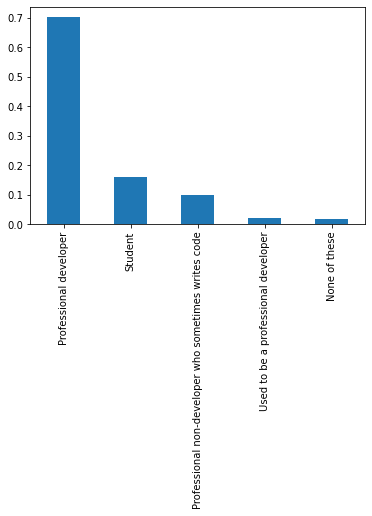

In [113]:
(df['Professional'].value_counts()/df.shape[0]).plot(kind='bar')

In [114]:
df.head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0


In [116]:
df['Country'].value_counts()

United States                     11455
India                              5197
United Kingdom                     4395
Germany                            4143
Canada                             2233
                                  ...  
Monaco                                1
Guam                                  1
Mali                                  1
S. Georgia & S. Sandwich Isls.        1
Guinea                                1
Name: Country, Length: 201, dtype: int64

In [61]:
df[[col for col in df.columns if df[col].notnull().all()]].columns

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation']

In [29]:
pd.notnull(results).any().count()

154

In [31]:
booll=pd.notnull(results)

In [35]:
results.columns[results.notnull().any()]

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)